## Explotary Data Analysis
not exhaustive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.shape

(1470, 35)

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Gender Analysis: 
In this section, we will try to see if there are any discrepancies between male and females in the organization. Also, we will look at other basic information such as the age, level of job satisfaction and average salary by gender.

### Questions to ask Ourselves: 
What is the age distribution between males and females? Are there any significant discrepancies?.
What is the average job satisfaction by attrition status? Is any type of gender more disatisfied than the other?What is the average salary by gender? What are the number of employees by Gender in each department?

### Summary: 
**Age by Gender**: The average age of females is 37.33 and for males is 36.65 and both distributions are similar.

**Job Satisfaction by Gender**: For individuals who didn't leave the organization, job satisfaction levels are practically the same. However, for people who left the organization , females had a lower satisfaction level as opposed to males.

**Salaries**: The average salaries for both genders are practically the same with males having an average of 6380.51 and females 6686.57

**Departments**: There are a higher number of males in the three departments however, females are more predominant in the Research and Development department.

In [7]:
df_male = data[data['Gender']=='Male']
df_female = data[data['Gender']=='Female']

In [8]:
avg_age = data[['Gender','Age']].groupby('Gender').Age.mean().reset_index()
avg_age

,Gender,Age
0,Female,37.329932
1,Male,36.653061


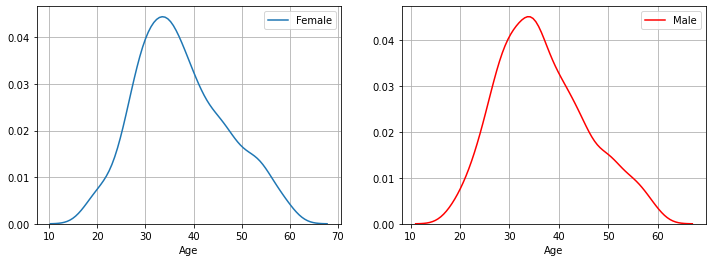

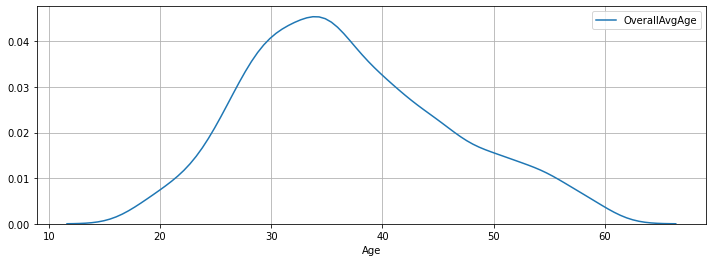

In [107]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(df_female['Age'], hist=False, label='Female')
plt.grid(True)

plt.subplot(122)
sns.distplot(df_male['Age'], hist=False, color='red', label='Male')
plt.grid(True)

plt.figure(figsize=(12,4))
sns.distplot(data['Age'], hist=False, label="OverallAvgAge")
plt.grid(True)
plt.show()

### Distribution of Job Satisfaction

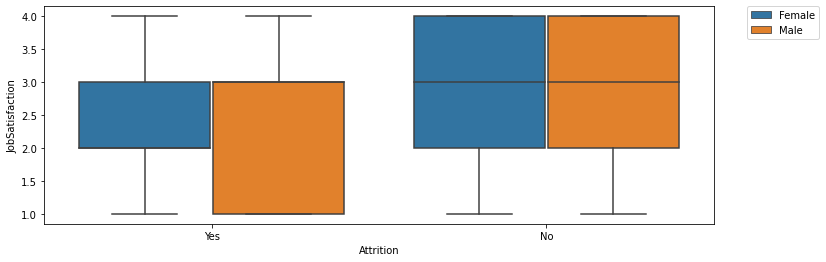

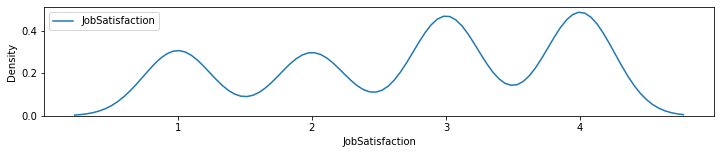

In [108]:
plt.figure(figsize=(12,4))
sns.boxplot(data['Attrition'], data['JobSatisfaction'], hue='Gender', data=data)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,2))
sns.distplot(data['JobSatisfaction'],hist=False, label='JobSatisfaction')
plt.ylabel('Density')
plt.show()


In [15]:
#sns.boxplot(df_male['Attrition'], df_male['JobSatisfaction'], hue='Gender', data=df_male)
#plt.show()

### Monthly Income by Gender

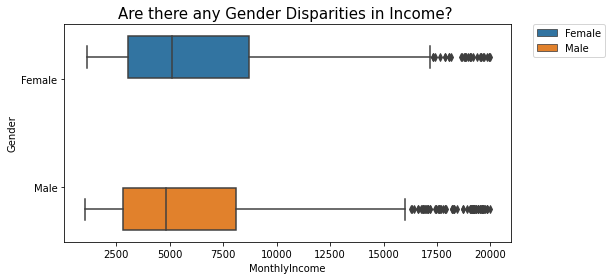

In [17]:
plt.figure(figsize=(8,4))

sns.boxplot(data['MonthlyIncome'],data['Gender'], hue='Gender', data=data)
plt.title('Are there any Gender Disparities in Income? ', fontsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Average Income and presence by Departmnt

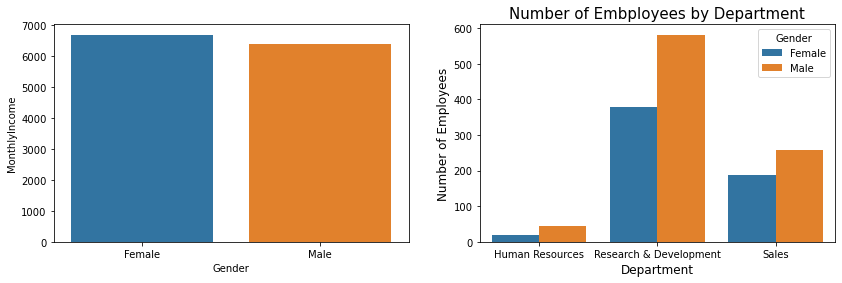

In [111]:
plt.figure(figsize=(14,4))

plt.subplot(121)
avg_salary = data.groupby('Gender')['MonthlyIncome'].mean().reset_index()
avg_salary
sns.barplot(avg_salary['Gender'], avg_salary['MonthlyIncome'])

plt.subplot(122)
gender_department = data.groupby(['Gender','Department']).EmployeeCount.sum().reset_index()
sns.barplot(gender_department['Department'], gender_department['EmployeeCount'],hue='Gender',data=gender_department)
plt.title('Number of Embployees by Department', fontsize=15)
plt.xlabel('Department',fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

plt.show()

In [19]:
avg_sal_male = df_male['MonthlyIncome'].mean()
avg_sal_female = df_female['MonthlyIncome'].mean()

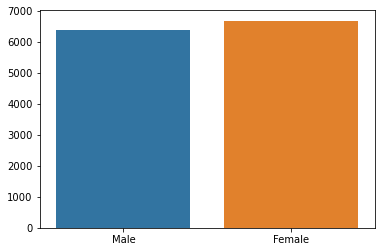

In [20]:
sns.barplot(['Male','Female'],[avg_sal_male,avg_sal_female])
plt.show()

## Analysis by Generation and Educational 

In [27]:
data['Generation'] = 0
data.loc[data['Age']<37, 'Generation'] = 'Millenials'
data.loc[(data['Age']>=37) & (data['Age']<54), 'Generation'] = 'Generation X'
data.loc[(data['Age']>=54) & (data['Age']<73), 'Generation'] = 'Bommers'
data.loc[data['Age']>73, 'Generation'] = 'Silents'

In [28]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Generation
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Generation X
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Generation X
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Generation X
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Millenials
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Millenials


#### Attrition by Educational Levels

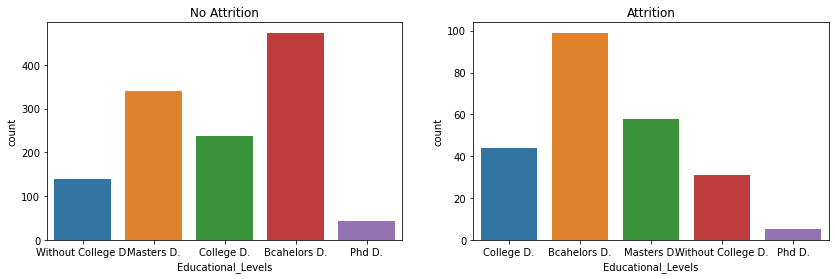

In [112]:
data['Educational_Levels'] = 0
data.loc[data['Education']==1, 'Educational_Levels'] = 'Without College D.'
data.loc[data['Education']==2, 'Educational_Levels'] = 'College D.'
data.loc[data['Education']==3, 'Educational_Levels'] = 'Bcahelors D.'
data.loc[data['Education']==4, 'Educational_Levels'] = 'Masters D.'
data.loc[data['Education']==5, 'Educational_Levels'] = 'Phd D.'

# create separate dataframe for attrition and no attrition 
attrition = data[data['Attrition']=='Yes']
no_attrition = data[data['Attrition']=='No']

# subplots
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.countplot(no_attrition['Educational_Levels'], orient='h')
plt.title('No Attrition', fontsize = 12)

plt.subplot(122)
sns.countplot(attrition['Educational_Levels'])
plt.title('Attrition')
plt.show()

#### Average Income by Department and Attrition Status

<Figure size 1008x432 with 0 Axes>

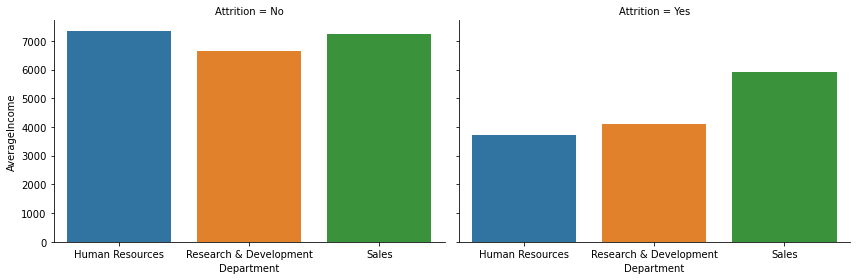

In [122]:
avg_income_dept = data[['Department','Attrition','MonthlyIncome']].groupby(['Department','Attrition']).MonthlyIncome.mean().reset_index()
avg_income_dept['AverageIncome'] = avg_income_dept['MonthlyIncome']
avg_income_dept.drop('MonthlyIncome',axis=1, inplace=True)

plt.figure(figsize=(14,6))
sns.catplot(x='Department',y='AverageIncome',col='Attrition',data=avg_income_dept, height=4,aspect = 1.5, kind='bar')
#plt.title('Average Income by Department and Attriition status', fontsize=16)

plt.show()

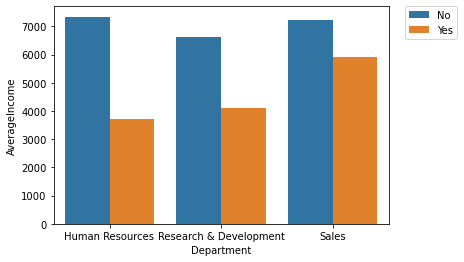

In [38]:
sns.barplot(avg_income_dept['Department'],avg_income_dept['AverageIncome'],hue='Attrition',data=avg_income_dept)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [161]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Generation', 'Educational_Levels', 'Managers',
       'Maangers'],
      dtype='object')

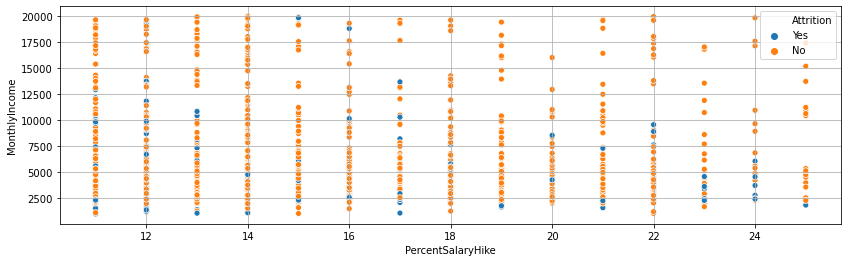

In [169]:

plt.figure(figsize=(14,4))
sns.scatterplot(data['PercentSalaryHike'],data['MonthlyIncome'],hue='Attrition',data=data,x_jitter=5)
plt.grid(True)

#sns.violinplot(attrition['MonthlyIncome'],attrition['PerformanceRating'])

#### Levels of Attrition by Over time status

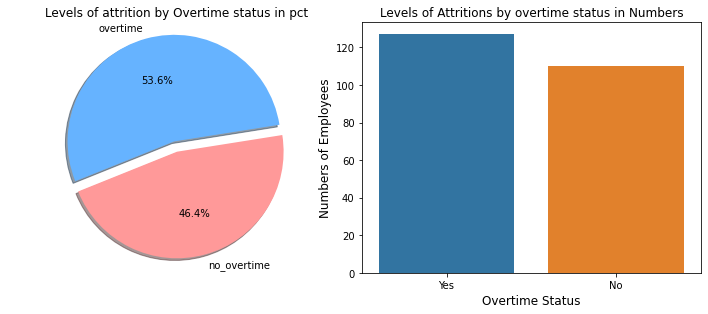

In [39]:
overtime_yes = attrition[attrition['OverTime']=='Yes']
overtime_no = attrition[attrition['OverTime']=='No']
overtime = overtime_yes['OverTime'].count()
no_overtime = overtime_no['OverTime'].count()

plt.figure(figsize=(10,4))
plt.subplot(121)
labels=['overtime','no_overtime']
sizes = [overtime,no_overtime]
colors = ['#66b3ff','#ff9999']
explode = (0.1, 0)

plt.pie(sizes,explode=explode, labels=labels,autopct='%1.1f%%',colors=colors, shadow=True, startangle=9 )
plt.title('Levels of attrition by Overtime status in pct', fontsize=12)
plt.axis('equal')
plt.tight_layout()

plt.subplot(122)
sns.barplot(['Yes','No'],[overtime,no_overtime])
plt.title('Levels of Attritions by overtime status in Numbers', fontsize=12)
plt.xlabel('Overtime Status', fontsize=12)
plt.ylabel('Numbers of Employees',fontsize=12)
plt.show()


### Working Environment ¶
In this section, we will explore everything that is related to the working environment and the structure of the organization.

#### Questions to ask Ourselves 
J**ob Roles**: How many employees in each Job Role?

**Salary by Job Role**: What's the average salary by job role?

**Attrition by Job Role**: What's the attrition percentage by job role? Which job role has the highest attrition rate? Which has the lowest?

**Years with Current Manager**: What's the average satisfaction rate by the status of the manager? Are recently hired managers providinga higher job satisfaction to employees?

**Working Environment by Job Role**: What's the working environment by job role?

#### Summary: 
**Number of Employees by Job Role**: **Sales** and **Research Scientist** are the job positions with the highest number of employees.

**Salary by Job Role**: **Managers** and **Research Directors** have the highest salary on average.

**Attrition by Job Role**: **ales Representatives**, **HealthCare Representatives** and **Managers** have the highest attrition rates. This could give us a hint that in these departments we are experiencing certain issues with employees.

**Managers**: Employees that are dealing with **recently hired managers** have a **lower satisfaction** score than **Managers** that have been there for a longer time.

**Working Environment**: As expected, managers and healthcare representatives are dealing with a lower working environment however, we don't see the same with sales representatives that could be because most sales representatives work outside the organization.

#### Number of Employees by Job role

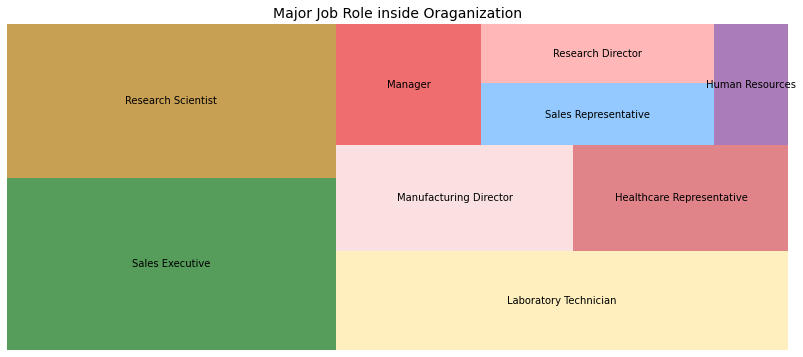

In [40]:
import squarify
df = data.groupby('JobRole').EmployeeCount.sum().reset_index().sort_values('EmployeeCount',ascending=False)
labels = list(df['JobRole'])
values =list(df['EmployeeCount'])
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033','#66b3ff','#ff9999','#87479d']


plt.figure(figsize=(14,6))
squarify.plot(sizes=values, label=labels,
              color=color_list, alpha=0.7)
plt.title('Major Job Role inside Oraganization', fontsize=14)
plt.axis('off')

plt.show()

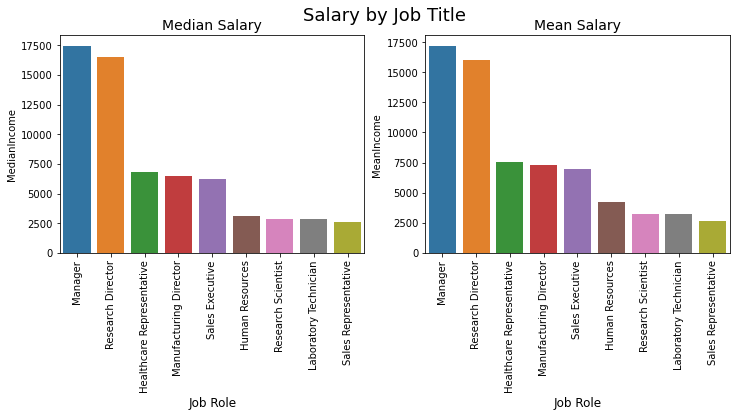

In [41]:

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.suptitle('Salary by Job Title', fontsize=18)
df1 = data.groupby('JobRole').MonthlyIncome.median().reset_index().sort_values('MonthlyIncome',ascending=False)
df1['MedianIncome'] = df1['MonthlyIncome']
df1.drop('MonthlyIncome',axis=1, inplace=True)
sns.barplot(df1['JobRole'],df1['MedianIncome'])
plt.title('Median Salary', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.xticks(rotation=90)

plt.subplot(122)
df2 = data.groupby('JobRole').MonthlyIncome.mean().reset_index().sort_values('MonthlyIncome',ascending=False)
df2['MeanIncome'] = df2['MonthlyIncome']
df2.drop('MonthlyIncome', axis=1, inplace=True)
sns.barplot(df2['JobRole'],df2['MeanIncome'])
plt.title('Mean Salary',fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [42]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Generation', 'Educational_Levels'],
      dtype='object')

#### Attririon by Job Role

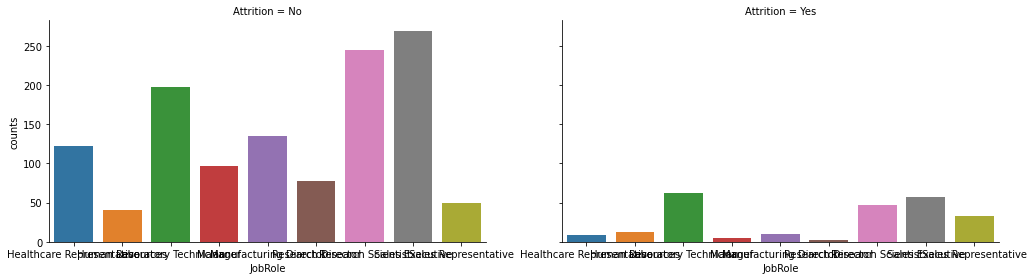

In [131]:
df1 = data.groupby(['JobRole','Attrition']).size().reset_index(name='counts')
sns.catplot(x='JobRole',y='counts', col='Attrition',data=df1, height=4, aspect=1.8, kind='bar')

#### Current Managers and Relationship Satisfaction

<Figure size 1008x288 with 0 Axes>

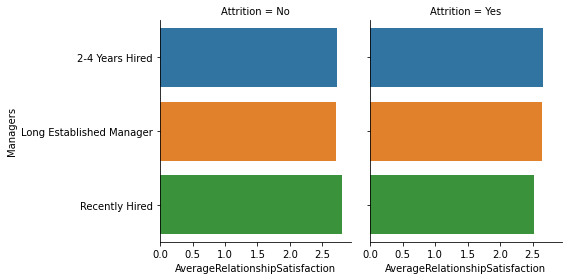

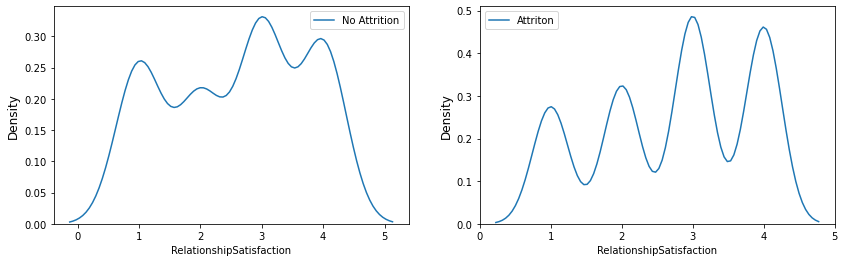

In [157]:
# Create a Categorical Value for Years with Current Manager
# Create a Categorical Value for RelationShip Satisfaction (
# Then we will use income as our Y-Axis


data['Managers'] = 0
data.loc[data['YearsWithCurrManager']<=1, 'Managers'] = 'Recently Hired'
data.loc[(data['YearsWithCurrManager']>1) & (data['YearsWithCurrManager']<=4) , 'Managers'] = '2-4 Years Hired'
data.loc[data['YearsWithCurrManager']>=4, 'Managers'] = 'Long Established Manager'


# Determine what is the Average Relationship Satisfaction with the Recently Hired Managers
rel_sat = data[['Managers','Attrition','RelationshipSatisfaction']].groupby(['Managers','Attrition']).RelationshipSatisfaction.mean().reset_index(name='AverageRelationshipSatisfaction')
plt.figure(figsize=(14,4))
sns.catplot(y='Managers',x='AverageRelationshipSatisfaction', col='Attrition', data=rel_sat, height=4, kind='bar')

# Create a Distribution by Attrition of the RelationShip Satisfaction
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(attrition['RelationshipSatisfaction'], hist=False, label='No Attrition')
plt.ylabel('Density',fontsize=12)

plt.subplot(122)
sns.distplot(no_attrition['RelationshipSatisfaction'], hist=False, label='Attriton')
plt.ylabel('Density',fontsize=12)
plt.show()


### An In-Depth Look into Attrition:
#### Digging into Attrition: 
In this section, we will go as deep as we can into employees that quit to have a better understanding what were some of the reasons that employees decided to leave the organization.

#### Questions to Ask Ourselves: 
**Attrition by Department**: How many employees quit by Department? Did they have a proper work-life balance?
**Distance from Work**: Is distance from work a huge factor in terms of quitting the organization?

<Figure size 864x288 with 0 Axes>

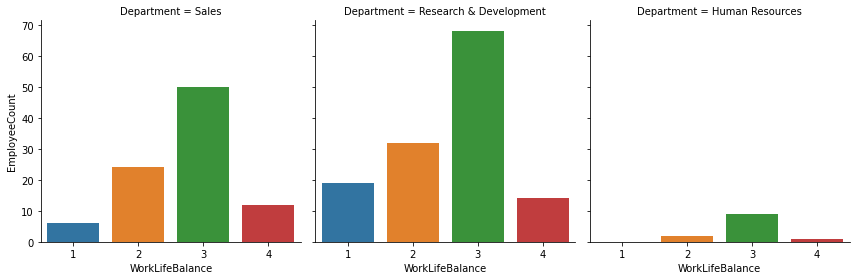

In [45]:
df = attrition.groupby(['Department','WorkLifeBalance']).EmployeeCount.sum().reset_index().sort_values(['Department','EmployeeCount'],ascending=False)
plt.figure(figsize=(12,4))
ax = sns.catplot(x="WorkLifeBalance", y="EmployeeCount",col='Department', data=df,height=4,kind='bar')
#plt.title('Is there Work llfe balance?', fontsize=16)
plt.show()

#### Other Factors that could Influence Attrition: 
In this section we will analyze other external factors that could have a possible influence on individuals leaving the organization.

Some of the factors include:

**Home Distance from Work**

**Business Travel**

**Marital Status**

**Stock Option Levels**

** We will further analyze this section there is lots to do.**

In [57]:
# Average distance of employees that didn't quit.
med_distance =no_attrition['DistanceFromHome'].median()  # this gives med_distance value 7

<ipython-input-84-de19e9b6f88d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition['Median_Distance'] = 0


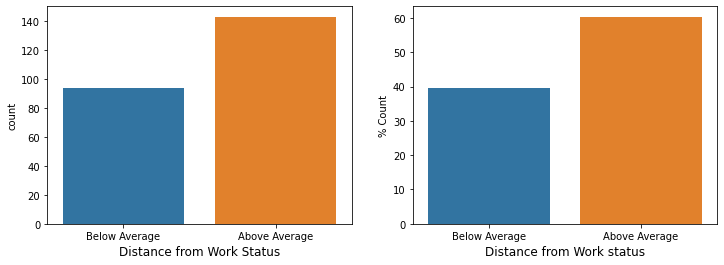

In [84]:
attrition['Median_Distance'] = 0
attrition.loc[attrition['DistanceFromHome']<7,'Median_Distance'] = 'Below Average'
attrition.loc[attrition['DistanceFromHome']>=7,'Median_Distance'] = 'Above Average'

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(attrition['Median_Distance'])
plt.xlabel('Distance from Work Status', fontsize=12)

plt.subplot(122)
above_avg_pct = (143*100)/(143+94)  # see value counts of 'Median_distance' column in attrition df
below_avg_pct = (94*100)/(143+94)
sns.barplot(['Below Average','Above Average'],[below_avg_pct,above_avg_pct])
plt.xlabel('Distance from Work status', fontsize=12)
plt.ylabel('% Count', fontsize=10)
plt.show()

In [87]:
df = data.groupby(['StockOptionLevel','Attrition']).EmployeeCount.sum().reset_index()
df

,StockOptionLevel,Attrition,EmployeeCount
0,0,No,477
1,0,Yes,154
2,1,No,540
3,1,Yes,56
4,2,No,146
5,2,Yes,12
6,3,No,70
7,3,Yes,15


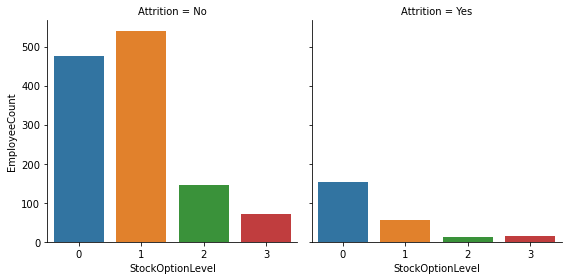

In [160]:
df = data.groupby(['StockOptionLevel','Attrition']).EmployeeCount.sum().reset_index()
sns.catplot(x='StockOptionLevel', y='EmployeeCount', col='Attrition', data = df, height=4, kind='bar')
plt.show()

In [102]:
df = data[['StockOptionLevel','Attrition','MonthlyIncome']].groupby(['StockOptionLevel','Attrition']).size().reset_index(name='counts')
df

,StockOptionLevel,Attrition,counts
0,0,No,477
1,0,Yes,154
2,1,No,540
3,1,Yes,56
4,2,No,146
5,2,Yes,12
6,3,No,70
7,3,Yes,15
